In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.special import gamma
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
sns.set_style("darkgrid")

In [12]:
file = pd.read_csv("data.csv")
columns = file.columns[8:15]
time_labels = [int(i.split("_")[1]) for i in columns]
time_check = max(time_labels)
print(time_labels)
bottom_limit = .665
top_limit = .71
train, test = train_test_split(file, test_size=0.2, random_state=42)

[0, 995, 4844, 8757, 12635, 16102, 19470]


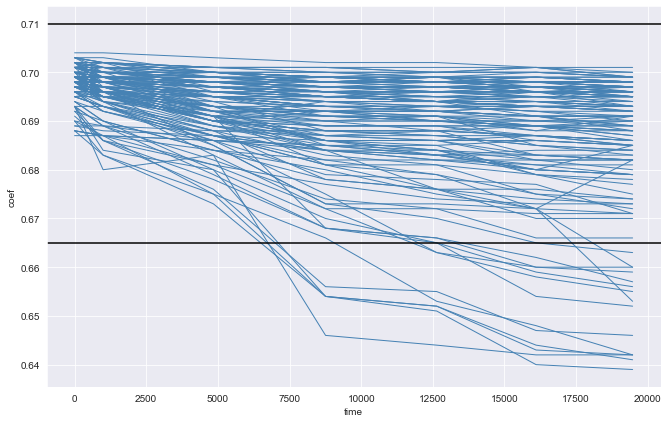

In [13]:
plt.figure(figsize=(11, 7))
for i in range(file.shape[0]):
    data = np.array(file[columns].iloc[i])
    plt.title('')
    plt.xlabel('time')
    plt.ylabel('coef')
    plt.plot(time_labels, data, color='steelblue', linewidth=1)
plt.axhline(y=bottom_limit, xmin=0, xmax=1, color='k', linewidth=1.5)
plt.axhline(y=top_limit, xmin=0, xmax=1, color='k', linewidth=1.5)

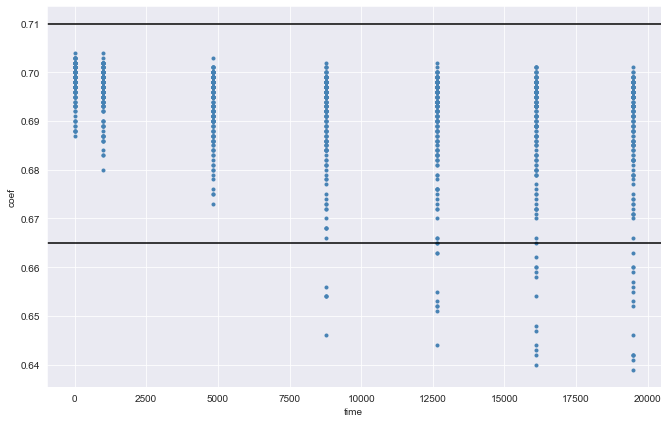

In [14]:
plt.figure(figsize=(11, 7))
for i in range(file.shape[0]):
    data = np.array(file[columns].iloc[i])
    plt.title('')
    plt.xlabel('time')
    plt.ylabel('coef')
    plt.scatter(time_labels, data, color='steelblue', marker=".")
plt.axhline(y=bottom_limit, xmin=0, xmax=1, color='k', linewidth=1.5)
plt.axhline(y=top_limit, xmin=0, xmax=1, color='k', linewidth=1.5)

In [15]:
mean = np.array([])
std = np.array([])
for i in columns:
    data = np.array(train[i])
    mean = np.append(mean, data.mean())
    std = np.append(std, data.std())
    # mean.append(data.mean())
    # std.append(data.std())

In [16]:
print(mean)
print(std)

[0.69809023 0.69630075 0.69302256 0.68953383 0.68859398 0.68715038
 0.68613534]
[0.00344769 0.00448051 0.0064113  0.01091495 0.01194539 0.01383006
 0.01447829]


In [29]:
print(gamma(1.45))

0.8856613802710722


In [17]:
time_labels_np = np.array(time_labels).reshape(-1, 1)

[0.69664023 0.69604367 0.69373593 0.69138983 0.68906471 0.68698602
 0.68496668]


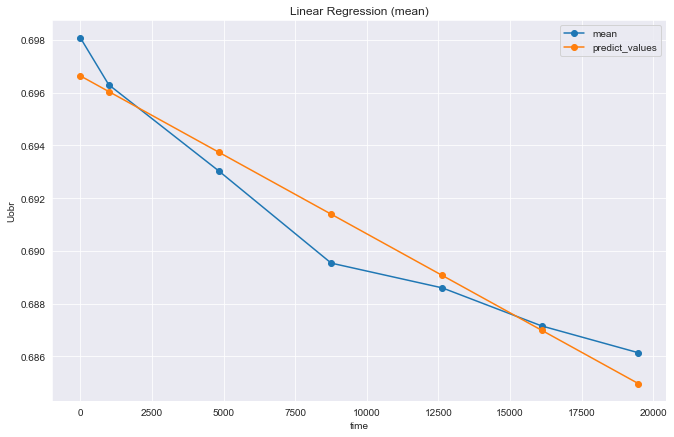

In [18]:
model_mean = LinearRegression()
model_mean.fit(time_labels_np, mean)
mean_coef = model_mean.coef_[0]
predict_values = model_mean.predict(time_labels_np)
plt.figure(figsize=(11, 7))
plt.title('Linear Regression (mean)')
plt.xlabel('time')
plt.ylabel('Uobr')
plt.plot(time_labels, mean, label="mean", marker="o")
plt.plot(time_labels, predict_values, label="predict_values", marker="o")
plt.legend()
print(predict_values)

[0.00404273 0.00463224 0.00691267 0.00923102 0.01152863 0.01358273
 0.01557818]


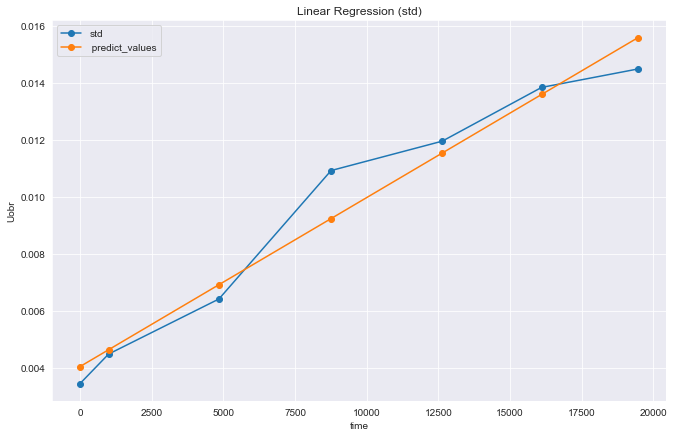

In [19]:
model_std = LinearRegression()
model_std.fit(time_labels_np, std)
std_coef = model_std.coef_[0]
predict_values = model_std.predict(time_labels_np)
plt.figure(figsize=(11, 7))
plt.title('Linear Regression (std)')
plt.xlabel('time')
plt.ylabel('Uobr')
plt.plot(time_labels, std, label="std", marker="o")
plt.plot(time_labels, predict_values, label=" predict_values", marker="o")
plt.legend()
print(predict_values)

In [20]:
mean_test_time0 = test[columns[0]].mean()
std_test_time0 = test[columns[0]].std()
mean_test = []
std_test = []
for i in time_labels:
    mean_test.append(mean_test_time0 + mean_coef * i)
    std_test.append(std_test_time0 + std_coef * i)

In [21]:
test_working_predict = []
for i in mean_test:
    for j in std_test:
        test_working_predict.append(
            sps.norm(loc=i, scale=j).cdf(top_limit) - sps.norm(loc=i, scale=j).cdf(bottom_limit))

In [22]:
test_working_experiment = []
for i in columns:
    working = 0
    for j in test[i]:
        if j > bottom_limit and j < top_limit:
            working += 1
    test_working_experiment.append(working / test.shape[0])

In [23]:
test_error = 0
for p, e in zip(test_working_predict, test_working_experiment):
    test_error += pow((p - e) / e, 2)
test_error = np.sqrt(test_error / len(test_working_predict))

In [24]:
print(f"Процент рабочих устройств\nВремя: Прогноз (Реальное значение)")
for t, p, e in zip(time_labels, test_working_predict, test_working_experiment):
    print(f"{t}: {p} ({e})")
print(f"Ошибка: {test_error}")

Процент рабочих устройств
Время: Прогноз (Реальное значение)
0: 0.99958066635037 (1.0)
995: 0.9979281559764025 (1.0)
4844: 0.9680336195647853 (1.0)
8757: 0.9134079294772797 (1.0)
12635: 0.8584242072647664 (0.9705882352941176)
16102: 0.8128525237459165 (0.9705882352941176)
19470: 0.7709596046153685 (0.9705882352941176)
Ошибка: 0.04299834932025246


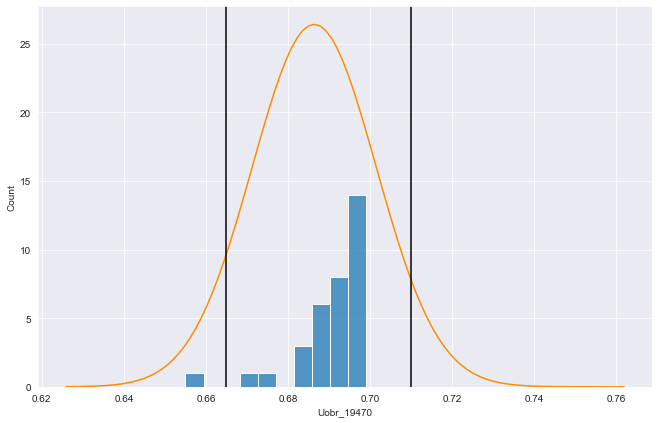

In [25]:
plt.figure(figsize=(11, 7))
sns.histplot(test[columns[6]], bins=10)
x = np.linspace(mean_test[len(mean_test) - 1] - 4 * std_test[len(std_test) - 1], mean_test[len(mean_test) - 1] + 5 * std_test[len(std_test) - 1], 100)
plt.plot(x, sps.norm(loc=mean_test[len(mean_test) - 1], scale=std_test[len(std_test) - 1]).pdf(x), color='darkorange')
plt.axvline(bottom_limit, 0, 1, color='k')
plt.axvline(top_limit, 0, 1, color='k')